In [70]:
#dependencies
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import sqlalchemy
from sqlalchemy.orm import Session
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import create_engine, inspect, func, desc
from sqlalchemy.sql import label
from flask import Flask, jsonify


# Prep and Connection

In [2]:
engine = create_engine('sqlite:///hawaii.sqlite')

In [3]:
auto_base = automap_base()
auto_base.prepare(engine, reflect=True)

In [4]:
Measurement = auto_base.classes.measurements_tbl
Stations = auto_base.classes.stations_tbl

In [5]:
inspector = inspect(engine)
inspector.get_table_names()

['measurements_tbl', 'stations_tbl']

# Precipitation Analysis

In [6]:
engine.execute('SELECT date FROM measurements_tbl ORDER BY date DESC LIMIT 10').fetchall()

[('2017-08-23',),
 ('2017-08-23',),
 ('2017-08-23',),
 ('2017-08-23',),
 ('2017-08-22',),
 ('2017-08-22',),
 ('2017-08-22',),
 ('2017-08-21',),
 ('2017-08-21',),
 ('2017-08-21',)]

In [7]:
session = Session(engine)

In [8]:
precip_query = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-09-01")

In [9]:
precip_data = {'date':[],'prcp':[]}

for r in precip_query:
    precip_data['date'].append(r.date)
    precip_data['prcp'].append(r.prcp)

In [10]:
precip_df = pd.DataFrame(data=precip_data)
precip_df = precip_df.set_index('date')
precip_df.head()

,prcp
date,
2016-09-01,0.00
2016-09-02,0.00
2016-09-03,0.00
2016-09-04,0.03
2016-09-07,0.05


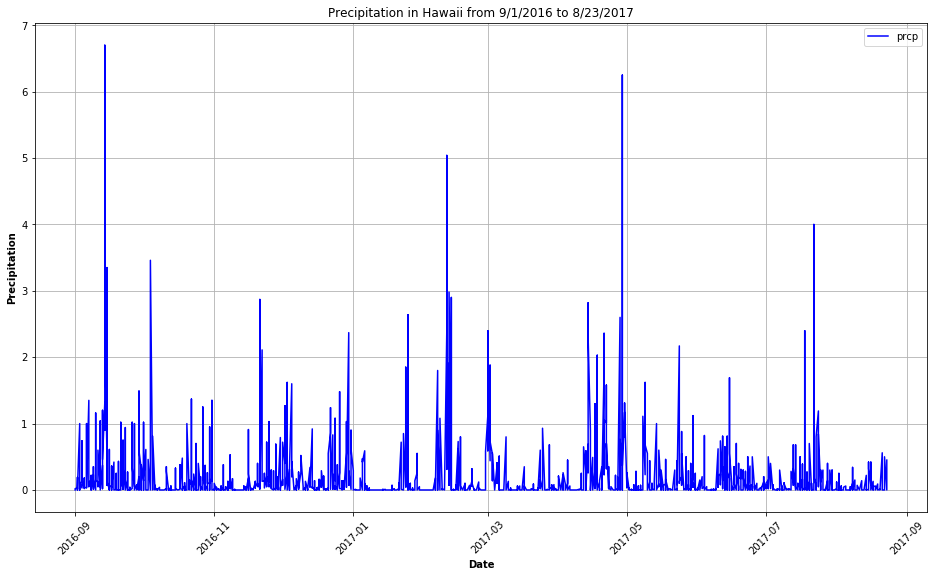

In [11]:
prec_plot = precip_df.plot(figsize = (16, 9), sort_columns=True, rot=45, use_index=True, legend=True, grid=True, color='b')
plt.ylabel('Precipitation', weight='bold')
plt.xlabel('Date', weight='bold')
plt.title("Precipitation in Hawaii from 9/1/2016 to 8/23/2017")
plt.show()

In [12]:
precip_df.describe()

,prcp
count,1968.000000
mean,0.171479
std,0.451817
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

In [13]:
station_num = session.query(Stations.id).count()
print(f"There are {station_num} stations in Hawaii")

There are 9 stations in Hawaii


In [14]:
most_active_station = session.query(Measurement.station, Stations.name, func.count(Measurement.tobs)).\
filter(Measurement.station == Stations.station).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()

most_active_station

[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2696),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2685),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2572),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2484),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 1937),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1932),
 ('USC00517948', 'PEARL CITY, HI US', 683),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 342)]

In [15]:
waihee_tobs = session.query(Measurement.tobs).\
filter(Measurement.station == "USC00519281", Measurement.station == Stations.station, Measurement.date >="2016-08-23", Measurement.date <="2017-08-23").\
all()

In [17]:
print(f' The most active station is Waihee with {len(waihee_tobs)} observations')

 The most active station is Waihee with 352 observations


In [20]:
temp_data = [temp[0] for temp in waihee_tobs]
temp_data

[77,
 77,
 80,
 80,
 75,
 73,
 78,
 77,
 78,
 80,
 80,
 78,
 78,
 78,
 73,
 74,
 80,
 79,
 77,
 80,
 76,
 79,
 75,
 79,
 78,
 79,
 78,
 78,
 76,
 74,
 77,
 78,
 79,
 79,
 77,
 80,
 78,
 78,
 78,
 77,
 79,
 79,
 79,
 79,
 75,
 76,
 73,
 72,
 71,
 77,
 79,
 78,
 79,
 77,
 79,
 77,
 78,
 78,
 78,
 78,
 77,
 74,
 75,
 76,
 73,
 76,
 74,
 77,
 76,
 76,
 74,
 75,
 75,
 75,
 75,
 71,
 63,
 70,
 68,
 67,
 77,
 74,
 77,
 76,
 76,
 75,
 76,
 75,
 73,
 75,
 73,
 75,
 74,
 75,
 74,
 75,
 73,
 75,
 73,
 73,
 74,
 70,
 72,
 70,
 67,
 67,
 69,
 70,
 68,
 69,
 69,
 66,
 65,
 68,
 62,
 75,
 70,
 69,
 76,
 76,
 74,
 73,
 71,
 74,
 74,
 72,
 71,
 72,
 74,
 69,
 67,
 72,
 70,
 64,
 63,
 63,
 62,
 70,
 70,
 62,
 62,
 63,
 65,
 69,
 77,
 70,
 74,
 69,
 72,
 71,
 69,
 71,
 71,
 72,
 72,
 69,
 70,
 66,
 65,
 69,
 68,
 68,
 68,
 59,
 60,
 70,
 73,
 75,
 64,
 59,
 59,
 62,
 68,
 70,
 73,
 79,
 75,
 65,
 70,
 74,
 70,
 70,
 71,
 71,
 71,
 69,
 61,
 67,
 65,
 72,
 71,
 73,
 72,
 77,
 73,
 67,
 62,
 64,
 67,
 66,


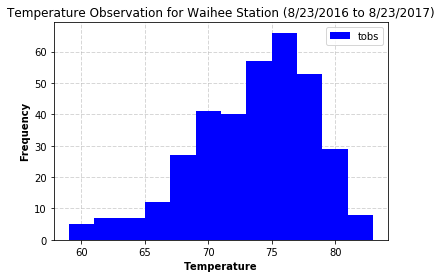

In [55]:
plt.grid(linewidth=1,alpha=.5,linestyle='dashed')
plt.hist(temp_data, bins=12, color='b',zorder=2)
plt.title("Temperature Observation for Waihee Station (8/23/2016 to 8/23/2017)")
plt.ylabel('Frequency', weight='bold')
plt.xlabel('Temperature', weight='bold')
labels = ['tobs']
plt.legend(labels)

# Temperature Analysis

In [68]:
def calc_temps(start, end):
    query = session.query(Measurement.tobs).filter(Measurement.date>=start, Measurement.date<=end).all()
    temperatures = [temp[0] for temp in query]
    mean_temp = np.mean(temperatures)
    max_temp = max(temperatures)
    min_temp = min(temperatures)
    
    

    plt.figure(figsize=(3,5))
    plt.bar(1, mean_temp, yerr=(max_temp - min_temp), tick_label='', color='salmon',alpha=.6,edgecolor='black')
    plt.ylabel('Temp (F)', weight='bold')
    plt.title('Trip Avg Temp', weight='bold')
    plt.show()

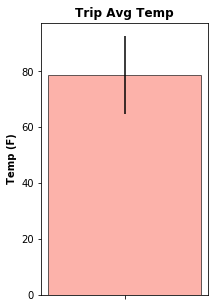

In [69]:
calc_temps(start="2017-08-07", end="2017-08-23")